## longwave variables (LW)

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \textcolor{lightblue}{\text{NetLW}} + \hat{h^ \prime} \ \text{SEF} + \hat{h^ \prime} \ \text{NetSW} - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$

$\textcolor{lightblue}{\text{NetLW}} = \textcolor{lightblue}{\text{rlus}} - \textcolor{lightblue}{\text{rlds}} - \textcolor{lightblue}{\text{rlut}}$


1. rlut  –  radiation longwave upwelling toa \
2. rlds  –  radiation longwave downwelling surface \
3. rlus  -  radiation longwave upwelling surface  

<br />


In [4]:
import intake
import xarray as xr
import numpy as np

import os
import myPlots

In [5]:
model='MPI-ESM1-2-HR'
experiment_id='historical'
period = slice('1970-01','1999-12')
member_id='r1i1p1f1'


## rlut  –  radiation longwave upwelling toa

In [6]:
table_id='E3hr'
variable_id = 'rlut'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,360),lat=slice(-30,30))


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version'


In [7]:
ds

<xarray.Dataset>
Dimensions:    (time: 87656, bnds: 2, lat: 64, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat        (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -29.92 -28.99 -28.99 ... 28.99 28.99 29.92
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rlut       (time, lat, lon) float32 dask.array<chunksize=(14608, 64, 384), meta=np.ndarray>
Attributes: (12/49)
    contact:                 cmip6-mpi-esm@dkrz.de
    source:                  MPI-ESM1.2-HR (2017): \naerosol: none, prescribe...
    project_id:              CMIP6
    source_type:             AOGCM
    intake_esm_varname:      ['rlut']
    institution_id:          MPI-M
    ...                      ...
    further_info_url:        https://furtherinfo.es-doc.org/CMIP6.MPI-M.MPI-E...
    source_id:               MPI-ESM1-2-HR
    experiment:              all-forcing simulation of the recent past
    sub_experiment:          none
    Conventions:             CF-1.7 CMIP-6.2
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [8]:
rlut_3hr=ds.rlut
rlut_3hr

<xarray.DataArray 'rlut' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      TOA Outgoing Longwave Radiation
    comment:        at the top of the atmosphere (to be compared with satelli...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:10Z altered by CMOR: Changed sign. 2019-...

In [9]:
rlut = rlut_3hr.resample(time='1D').mean(dim='time', keep_attrs=True)
rlut

<xarray.DataArray 'rlut' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  toa_outgoing_longwave_flux
    long_name:      TOA Outgoing Longwave Radiation
    comment:        at the top of the atmosphere (to be compared with satelli...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:10Z altered by CMOR: Changed sign. 2019-...

In [10]:
rlut_test=rlut.isel(time=slice(0, 4))

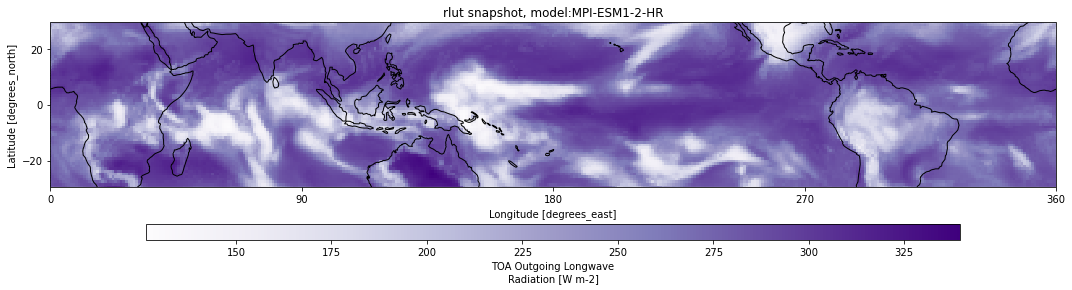

In [12]:
myPlots.plot_snapshot(rlut.isel(time=0), 'Purples', 'rlut', model)

In [13]:
# save = True
# if save:
#     folder = '/g/data/k10/cb4968/data/cmip6/' + model
#     os.makedirs(folder, exist_ok=True)

#     fileName = model + '_lw_rlut_' + experiment_id + '.nc'
#     path = folder + '/' + fileName
#     if os.path.exists(path):
#         os.remove(path)    

#     xr.Dataset({'rlut_test': rlut_test}).to_netcdf(path)

In [14]:
del ds
del rlut_3hr

## rlds  –  radiation longwave downwelling surface

In [15]:
table_id='3hr'
variable_id = 'rlds'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].sel(time=period, lon=slice(0,360),lat=slice(-30,30))


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.activity_id.institution_id.source_id.experiment_id.member_id.table_id.variable_id.grid_label.version'


RuntimeError: can't start new thread

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (time: 482120, bnds: 2, lat: 192, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rlds       (time, lat, lon) float32 dask.array<chunksize=(14608, 192, 384), meta=np.ndarray>
Attributes: (12/49)
    parent_source_id:        MPI-ESM1-2-HR
    activity_id:             CMIP
    product:                 model-output
    sub_experiment_id:       none
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    branch_time_in_child:    0.0
    ...                      ...
    variant_label:           r1i1p1f1
    parent_activity_id:      CMIP
    Conventions:             CF-1.7 CMIP-6.2
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    institution_id:          MPI-M
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [ ]:
rlds_3hr=ds.rlds
rlds_3hr

<xarray.DataArray 'rlds' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_downwelling_longwave_flux_in_air
    long_name:      Surface Downwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    original_name:  rlds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

In [ ]:
rlds = rlds_3hr.resample(time='1D').mean(dim='time', keep_attrs=True)
rlds

<xarray.DataArray 'rlds' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  surface_downwelling_longwave_flux_in_air
    long_name:      Surface Downwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    original_name:  rlds
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:04Z altered by CMOR: replaced missing va...

In [ ]:
rlds_test=rlds.isel(time=slice(0, 4))

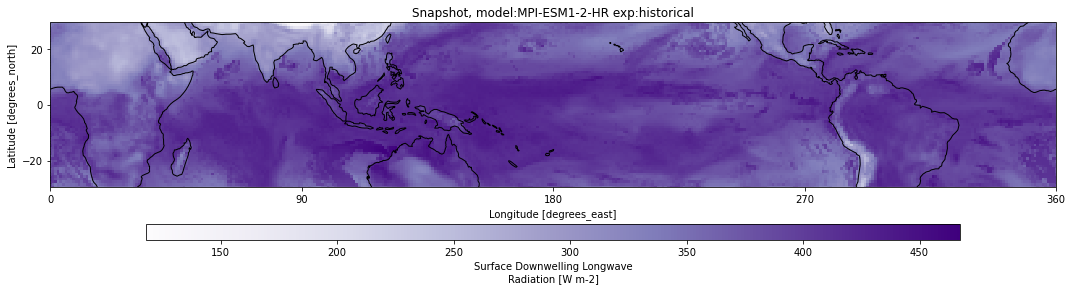

In [ ]:
myPlots.plot_snapshot(rlds.isel(time=0), 'Purples', 'rlds', model)

In [ ]:
# save = True
# if save:
#     folder = '/g/data/k10/cb4968/data/cmip6/' + model
#     os.makedirs(folder, exist_ok=True)

#     fileName = model + '_lw_rlds_' + experiment_id + '.nc'
#     path = folder + '/' + fileName
#     if os.path.exists(path):
#         os.remove(path)    

#     xr.Dataset({'rlds_test': rlds_test}).to_netcdf(path)

In [ ]:
del ds
del rlds_3hr

In [ ]:
# ds = xr.open_dataset('/g/data/k10/cb4968/data/cmip6/' + model + '/' + model + '_lw_rlut_' + experiment_id + '.nc')
# rlut_test = ds.rlut_test

# ds = xr.open_dataset('/g/data/k10/cb4968/data/cmip6/' + model + '/' + model + '_lw_rlds_' + experiment_id + '.nc')
# rlds_test = ds.rlds_test

## rlus  -  radiation longwave upwelling surface

In [ ]:
table_id='3hr'
variable_id = 'rlus'
ds_dict= intake.cat.nci['esgf'].cmip6.search(
                                source_id=model, 
                                experiment_id=experiment_id, 
                                member_id=member_id, 
                                variable_id=variable_id, 
                                table_id=table_id).to_dataset_dict()

ds = ds_dict[list(ds_dict.keys())[-1]].isel(time=slice(43800*8+8*28+8, (43800+10950)*8+8*36)).sel(lon=slice(0,360),lat=slice(-30,30))
#ds = ds_dict[list(ds_dict.keys())[-1]].sel(lon=slice(0,360),lat=slice(-30,30))

In [ ]:
ds

<xarray.Dataset>
Dimensions:    (time: 482120, bnds: 2, lat: 192, lon: 384)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-01T01:30:00 ... 2014-12-31T22:30:00
  * lat        (lat) float64 -89.28 -88.36 -87.42 -86.49 ... 87.42 88.36 89.28
  * lon        (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(14608, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 -89.75 -88.82 -88.82 ... 88.82 88.82 89.75
    lon_bnds   (lon, bnds) float64 -0.4688 0.4688 0.4688 ... 358.6 358.6 359.5
    rlus       (time, lat, lon) float32 dask.array<chunksize=(14608, 192, 384), meta=np.ndarray>
Attributes: (12/49)
    parent_source_id:        MPI-ESM1-2-HR
    activity_id:             CMIP
    product:                 model-output
    sub_experiment_id:       none
    table_info:              Creation Date:(09 May 2019) MD5:e6ef8ececc8f3386...
    branch_time_in_child:    0.0
    ...                      ...
    variant_label:           r1i1p1f1
    parent_activity_id:      CMIP
    Conventions:             CF-1.7 CMIP-6.2
    references:              MPI-ESM: Mauritsen, T. et al. (2019), Developmen...
    institution_id:          MPI-M
    intake_esm_dataset_key:  CMIP6.CMIP.MPI-M.MPI-ESM1-2-HR.historical.r1i1p1...

In [ ]:
rlus_3hr=ds.rlus
rlus_3hr

<xarray.DataArray 'rlus' (time: 87656, lat: 64, lon: 384)>
dask.array<getitem, shape=(87656, 64, 384), dtype=float32, chunksize=(14616, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T01:30:00 ... 1999-12-31T22:30:00
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
Attributes:
    standard_name:  surface_upwelling_longwave_flux_in_air
    long_name:      Surface Upwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

In [ ]:
rlus = rlus_3hr.resample(time='1D').mean(dim='time', keep_attrs=True)
rlus

<xarray.DataArray 'rlus' (time: 10957, lat: 64, lon: 384)>
dask.array<stack, shape=(10957, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 ... 1999-12-31
Attributes:
    standard_name:  surface_upwelling_longwave_flux_in_air
    long_name:      Surface Upwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

In [ ]:
rlus_test=rlus.isel(time=slice(0, 4))
rlus_test

<xarray.DataArray 'rlus' (time: 4, lat: 64, lon: 384)>
dask.array<getitem, shape=(4, 64, 384), dtype=float32, chunksize=(1, 64, 384), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -29.45 -28.52 -27.58 -26.65 ... 27.58 28.52 29.45
  * lon      (lon) float64 0.0 0.9375 1.875 2.812 ... 356.2 357.2 358.1 359.1
  * time     (time) datetime64[ns] 1970-01-01 1970-01-02 1970-01-03 1970-01-04
Attributes:
    standard_name:  surface_upwelling_longwave_flux_in_air
    long_name:      Surface Upwelling Longwave Radiation
    comment:        The surface called 'surface' means the lower boundary of ...
    units:          W m-2
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-08-25T06:42:05Z altered by CMOR: Changed sign. 2019-...

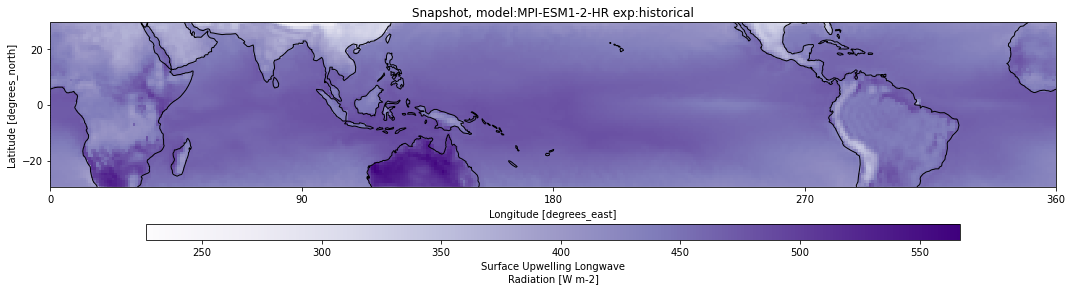

In [ ]:
myPlots.plot_snapshot(rlus.isel(time=0), 'Purples', 'rlus', model)

In [ ]:
del ds
del rlus_3hr

## lw

In [ ]:
netlw_test = rlus_test - rlds_test - rlut_test

In [ ]:
netlw = rlus - rlds - rlut

In [ ]:
netlw_tMean = netlw.mean(dim = 'time', keep_attrs=True)

In [ ]:
aWeights = np.cos(np.deg2rad(netlw.lat))
netlw_sMean = netlw.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True)

In [ ]:
netlw_anom = netlw - netlw_sMean

In [ ]:
# longwave radiation test
save = False
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_lw_test_' + experiment_id + '.nc'
    dataset = xr.Dataset({
                        'netlw_test': netlw_test, 
                        'rlut_test': rlut_test, 
                        'rlds_test': rlds_test,
                        'rlus_test': rlus_test})

    myFuncs.save_file(dataset,folder,fileName)

In [ ]:
# longwave radiation tMean
save = False
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_lw_tMean_' + experiment_id + '.nc'
    dataset = xr.Dataset({'netlw_tMean': netlw_tMean})
    myFuncs.save_file(dataset,folder,fileName)

In [ ]:
# longwave radiation anomaly from mean
save = False
if save:
    folder = '/g/data/k10/cb4968/cmip6/' + model
    fileName = model + '_lw_anom_' + experiment_id + '.nc'
    dataset = xr.Dataset({
                'netlw_anom': netlw_anom.weighted(aWeights).mean(dim=('lat','lon'), keep_attrs=True), 
                'netlw_sMean': netlw_sMean}).to_netcdf(path)
    myFuncs.save_file(dataset,folder,fileName)